In [1]:
%load_ext autoreload
%autoreload 2


import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'
import logging
logging.getLogger().setLevel(logging.DEBUG)

In [2]:
from torchsummary import summary
import torch
use_cuda=torch.cuda.is_available()
import pytorch
from pytorch import dataset as ptd

import os
import datasets
import torch.optim as optim

dataset_name="mnist"

(x_train, y_train), (x_test, y_test), input_shape,num_classes = datasets.get_data(dataset_name)
dataset=ptd.ClassificationDataset(dataset_name,x_train,x_test,y_train,y_test,num_classes,input_shape)

print('x_train shape:', x_train.shape,x_train.dtype)
print('x_test shape:', x_test.shape,x_test.dtype)
print('y_train shape:', y_train.shape,y_train.dtype)
print('y_test shape:', y_test.shape,y_test.dtype)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


import numpy as np
print(np.unique(y_train.argmax(axis=1)))
print(y_train.min(),y_train.max())


Using TensorFlow backend.
/home/facundo/.python/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


x_train shape: (60000, 28, 28, 1) uint8
x_test shape: (10000, 28, 28, 1) uint8
y_train shape: (60000, 10) float64
y_test shape: (10000, 10) float64
60000 train samples
10000 test samples
[0 1 2 3 4 5 6 7 8 9]
0.0 1.0


In [3]:
from pytorch.experiment import models

model_name="SimpleConv"
model, optimizer, rotated_model, rotated_optimizer = models.get_model(model_name,dataset,use_cuda)

print(model)
print(rotated_model)

SimpleConv(
  (conv): SequentialWithIntermediates(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
  )
  (fc): SequentialWithIntermediates(
    (0): Linear(in_features=6272, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=10, bias=True)
  )
)
SimpleConv(
  (conv): SequentialWithIntermediates(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(

Training model with unrotated dataset...


Epoch 1: 100% (batch 938/938)  ==stats==> loss:  0.146, accuracy:  0.955, Time:  0:00:07


Test => Loss: 0.0398, Accuracy: 98.75% (9875/10000)


Epoch 2: 100% (batch 938/938)  ==stats==> loss: 0.0414, accuracy:  0.988, Time:  0:00:07


Test => Loss: 0.0318, Accuracy: 98.96% (9896/10000)


Epoch 3: 100% (batch 938/938)  ==stats==> loss:  0.029, accuracy:  0.991, Time:  0:00:07


Test => Loss: 0.0316, Accuracy: 99.05% (9905/10000)


Epoch 4: 100% (batch 938/938)  ==stats==> loss: 0.0233, accuracy:  0.993, Time:  0:00:07


Test => Loss: 0.0273, Accuracy: 99.16% (9916/10000)


Epoch 5: 100% (batch 938/938)  ==stats==> loss: 0.0175, accuracy:  0.995, Time:  0:00:07


Test => Loss: 0.0295, Accuracy: 99.16% (9916/10000)


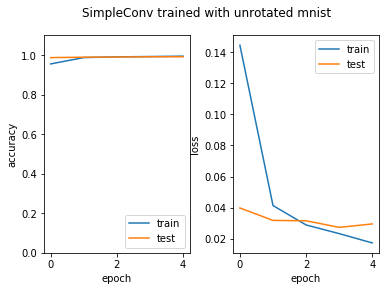

Skipping pretraining rotated model with unrotated dataset
Training rotated model with rotated dataset...


Epoch 1: 100% (batch 938/938)  ==stats==> loss:  0.496, accuracy:  0.835, Time:  0:00:07


Test => Loss: 0.2118, Accuracy: 92.97% (9297/10000)


Epoch 2: 100% (batch 938/938)  ==stats==> loss:  0.187, accuracy:  0.941, Time:  0:00:07


Test => Loss: 0.1429, Accuracy: 95.38% (9538/10000)


Epoch 3: 100% (batch 938/938)  ==stats==> loss:  0.147, accuracy:  0.954, Time:  0:00:07


Test => Loss: 0.1559, Accuracy: 95.21% (9521/10000)


Epoch 4: 100% (batch 938/938)  ==stats==> loss:  0.123, accuracy:  0.961, Time:  0:00:07


Test => Loss: 0.1124, Accuracy: 96.25% (9625/10000)


Epoch 5: 100% (batch 938/938)  ==stats==> loss:  0.113, accuracy:  0.966, Time:  0:00:07


Test => Loss: 0.0914, Accuracy: 97.05% (9705/10000)


Epoch 6: 100% (batch 938/938)  ==stats==> loss:  0.104, accuracy:  0.967, Time:  0:00:07


Test => Loss: 0.0918, Accuracy: 96.86% (9686/10000)


Epoch 7: 100% (batch 938/938)  ==stats==> loss: 0.0954, accuracy:   0.97, Time:  0:00:07


Test => Loss: 0.0974, Accuracy: 96.79% (9679/10000)


Epoch 8: 100% (batch 938/938)  ==stats==> loss: 0.0892, accuracy:  0.972, Time:  0:00:07


Test => Loss: 0.1051, Accuracy: 96.57% (9657/10000)


Epoch 9: 100% (batch 938/938)  ==stats==> loss: 0.0845, accuracy:  0.974, Time:  0:00:07


Test => Loss: 0.0838, Accuracy: 97.28% (9728/10000)


Epoch 10: 100% (batch 938/938)  ==stats==> loss: 0.0829, accuracy:  0.974, Time:  0:00:07


Test => Loss: 0.0794, Accuracy: 97.46% (9746/10000)


Epoch 11: 100% (batch 938/938)  ==stats==> loss:  0.076, accuracy:  0.977, Time:  0:00:07


Test => Loss: 0.0927, Accuracy: 97.19% (9719/10000)


Epoch 12: 100% (batch 938/938)  ==stats==> loss: 0.0729, accuracy:  0.977, Time:  0:00:07


Test => Loss: 0.0773, Accuracy: 97.59% (9759/10000)


Epoch 13: 100% (batch 938/938)  ==stats==> loss: 0.0716, accuracy:  0.977, Time:  0:00:07


Test => Loss: 0.0685, Accuracy: 97.94% (9794/10000)


Epoch 14: 100% (batch 938/938)  ==stats==> loss: 0.0691, accuracy:  0.979, Time:  0:00:07


Test => Loss: 0.0682, Accuracy: 97.88% (9788/10000)


Epoch 15: 100% (batch 938/938)  ==stats==> loss: 0.0659, accuracy:   0.98, Time:  0:00:07


Test => Loss: 0.0743, Accuracy: 97.63% (9763/10000)


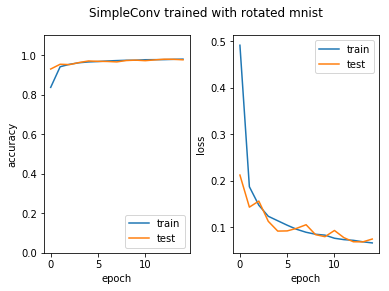

Testing both models on both datasets...


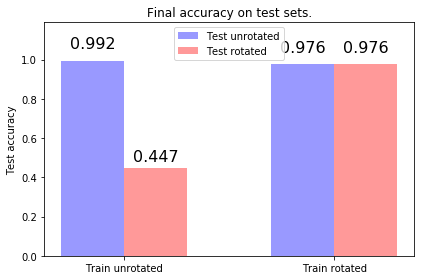

model_rotated_test_dataset score: loss=4.741767, accuracy=0.447200
model_rotated_train_dataset score: loss=4.838051, accuracy=0.444383
model_test_dataset score: loss=0.029533, accuracy=0.991600
model_train_dataset score: loss=0.013129, accuracy=0.995600
rotated_model_rotated_test_dataset score: loss=0.073102, accuracy=0.976400
rotated_model_rotated_train_dataset score: loss=0.065957, accuracy=0.979200
rotated_model_test_dataset score: loss=0.080088, accuracy=0.975700
rotated_model_train_dataset score: loss=0.068989, accuracy=0.979300


In [4]:
from pytorch.experiment import rotation
batch_size = 64

def get_epochs(dataset,model):
    if model=="SimpleConv":        
        epochs={'cifar10':70,'mnist':5,'fashion_mnist':12,'cluttered_mnist':10,'lsa16':50,'mnist_rot':5,'pugeault':15}
        rotated_epochs={'cifar10':120,'mnist':15,'fashion_mnist':60,'cluttered_mnist':30,'lsa16':100,'mnist_rot':5,'pugeault':40}
    elif model=="AllConv":
        epochs={'cifar10':5,'mnist':2,'fashion_mnist':12,'cluttered_mnist':10,'lsa16':50,'mnist_rot':5,'pugeault':15}
        rotated_epochs={'cifar10':100,'mnist':5,'fashion_mnist':60,'cluttered_mnist':30,'lsa16':100,'mnist_rot':5,'pugeault':40}
    else:
        raise ValueError(f"Invalid model name: {model}")
    return epochs[dataset],rotated_epochs[dataset]

epochs,rotated_epochs=get_epochs(dataset.name,model_name)

config=rotation.TrainRotatedConfig(batch_size=batch_size,
                   epochs=epochs,rotated_epochs=rotated_epochs,
                   pre_rotated_epochs=0, optimizer=optimizer,rotated_optimizer=rotated_optimizer,
                  use_cuda=use_cuda)

scores=rotation.run(config,model,rotated_model,dataset,plot_accuracy=True,save_plots=False)
for k,v in scores.items():
    print('%s score: loss=%f, accuracy=%f' % (k,v[0],v[1]))


Calculating variance for all samples by class...


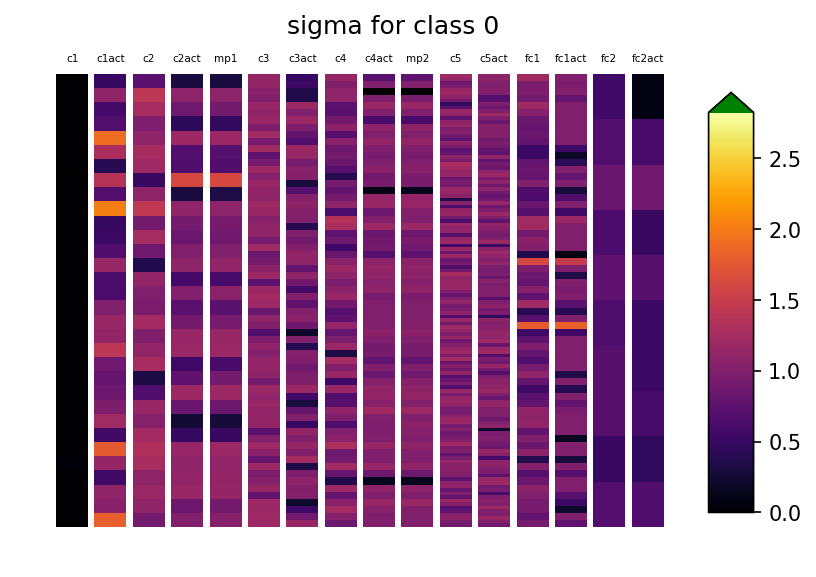

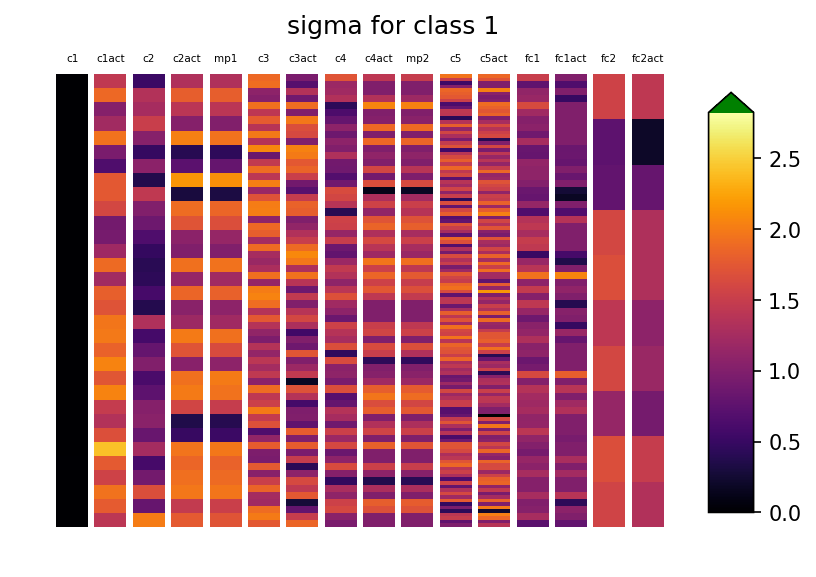

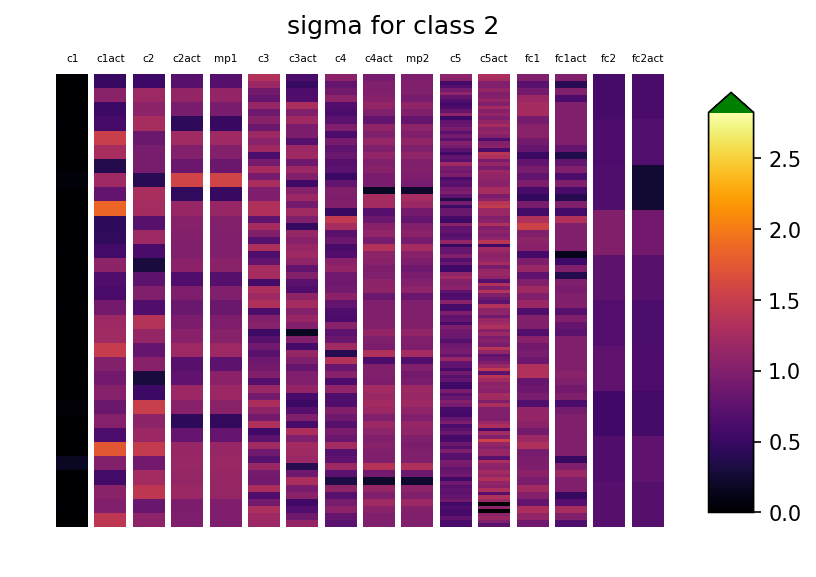

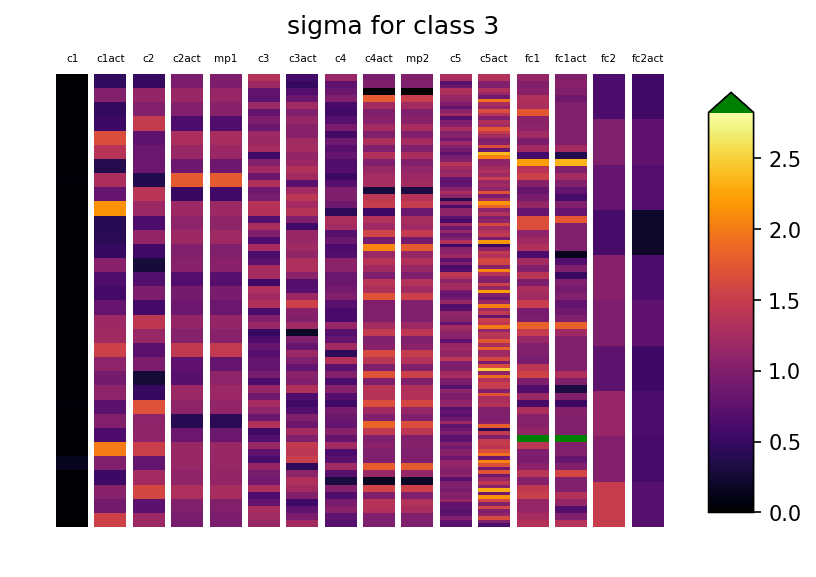

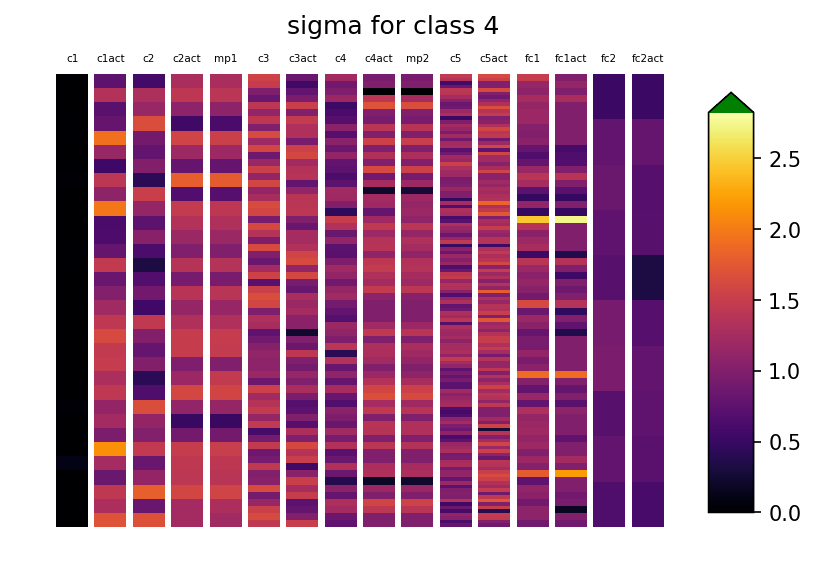

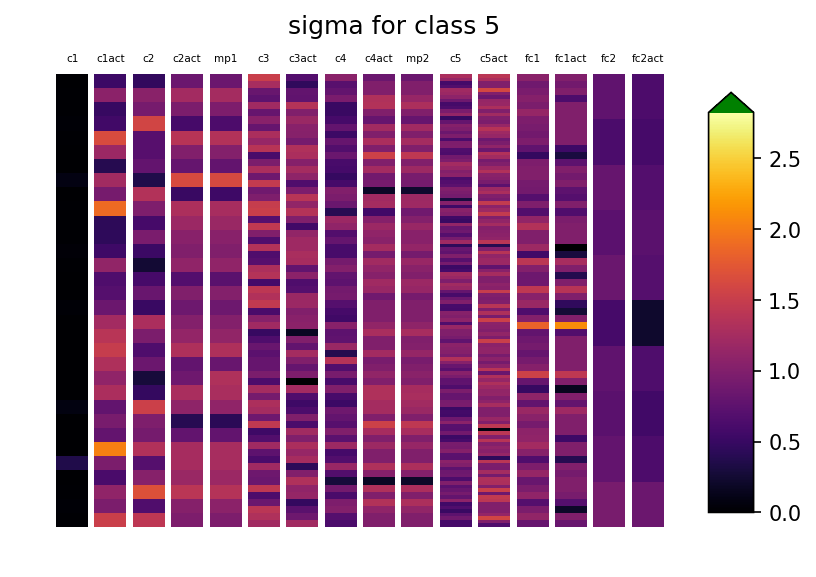

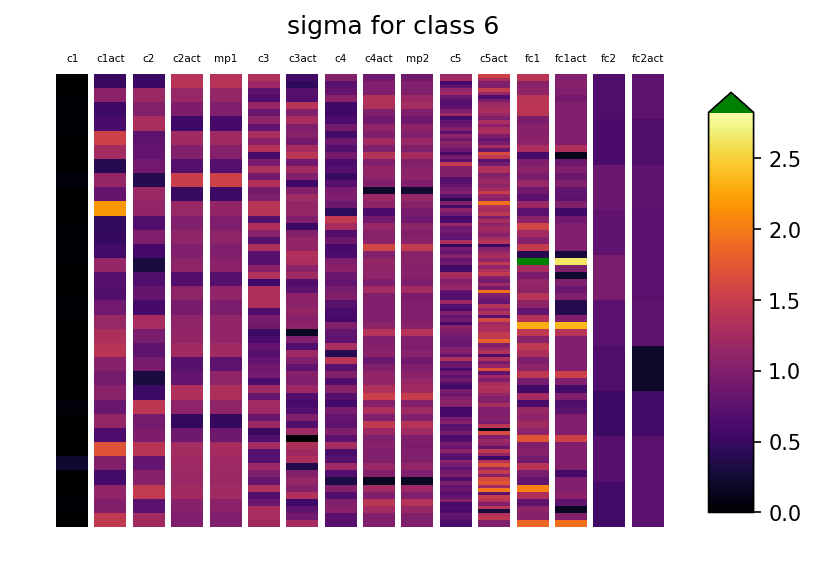

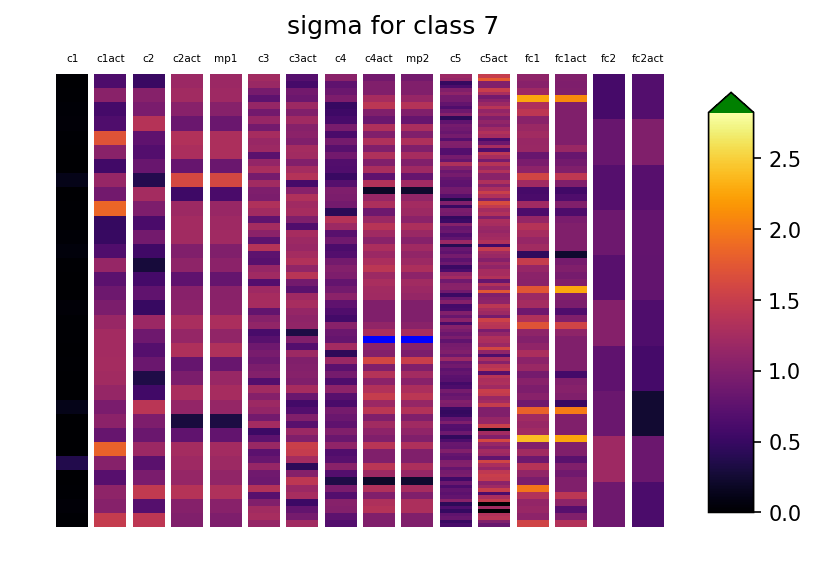

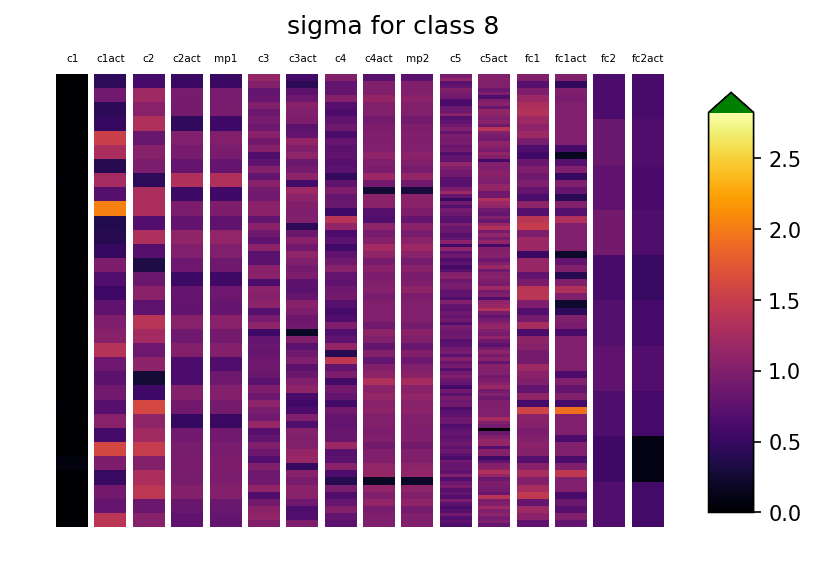

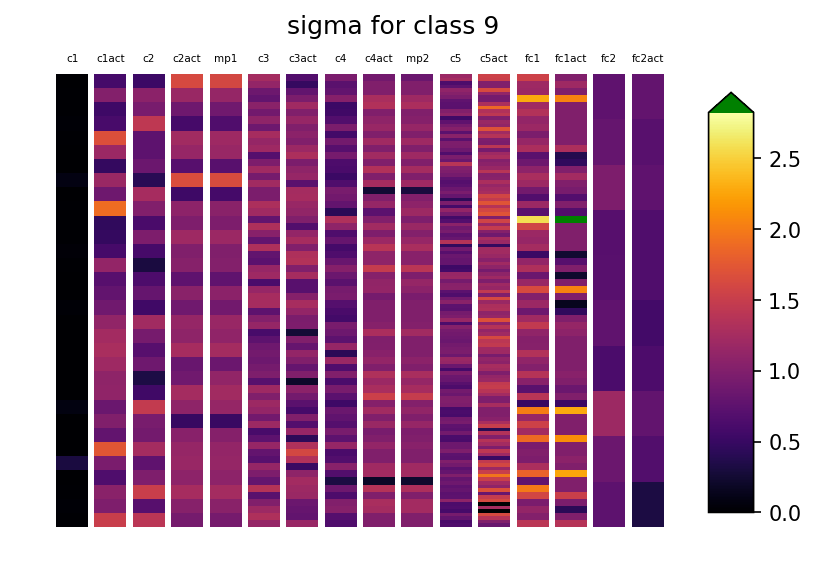

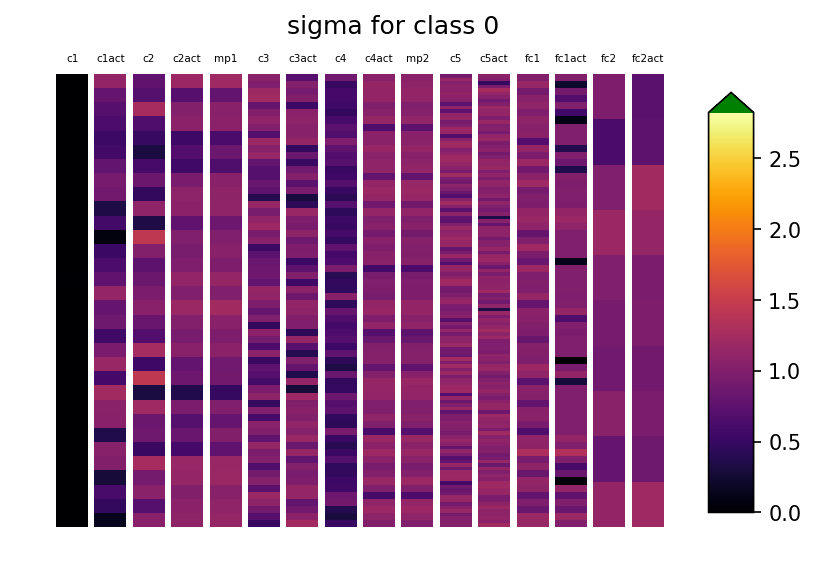

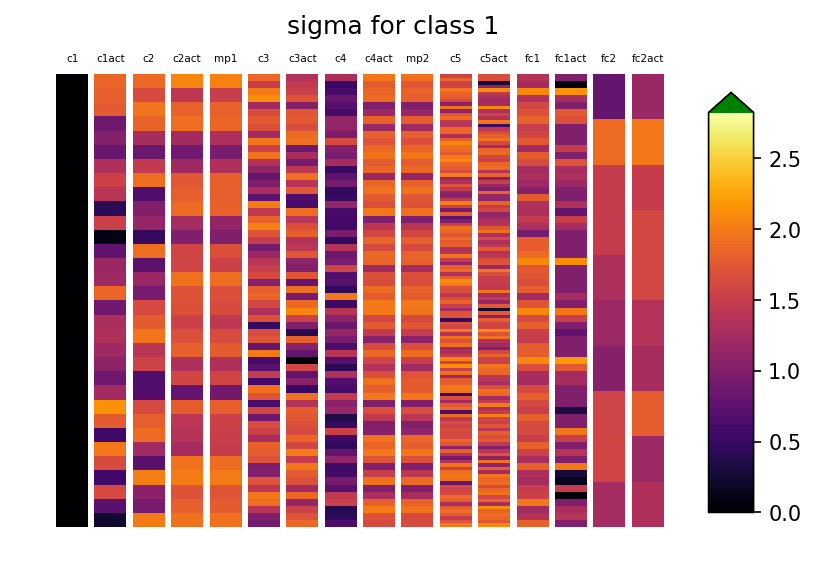

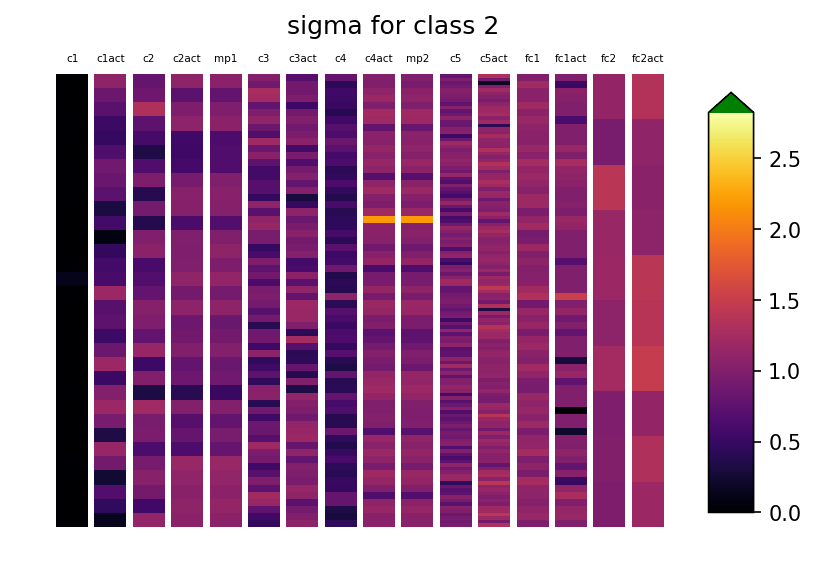

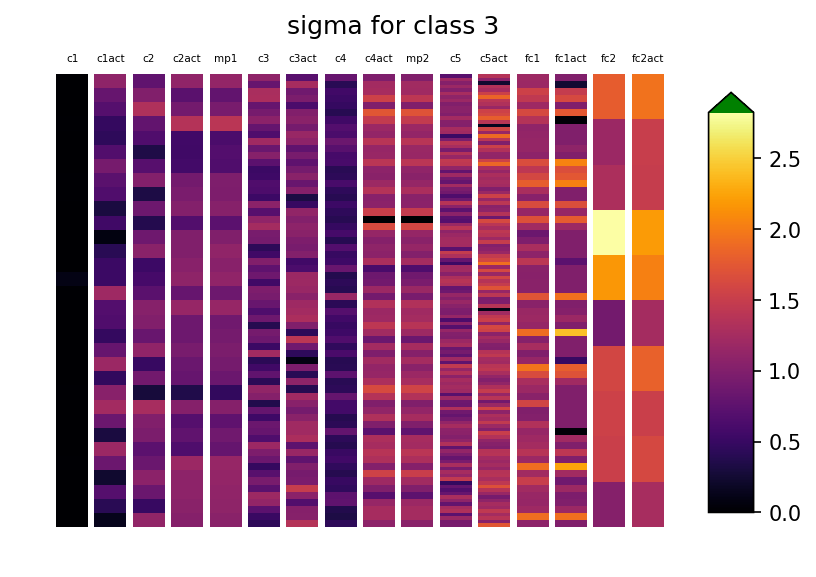

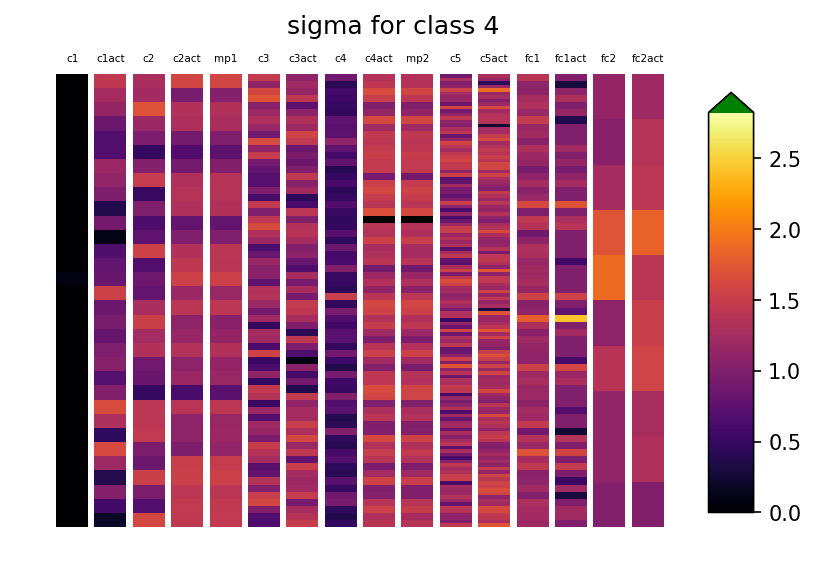

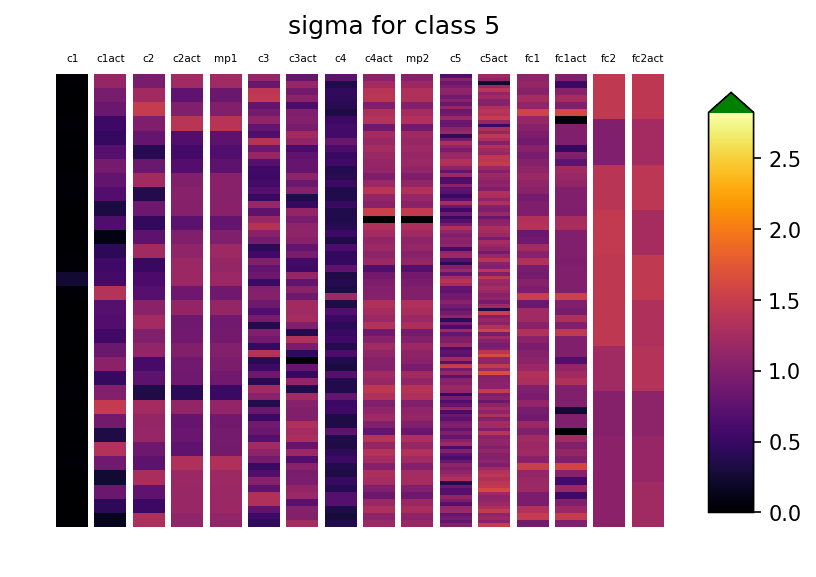

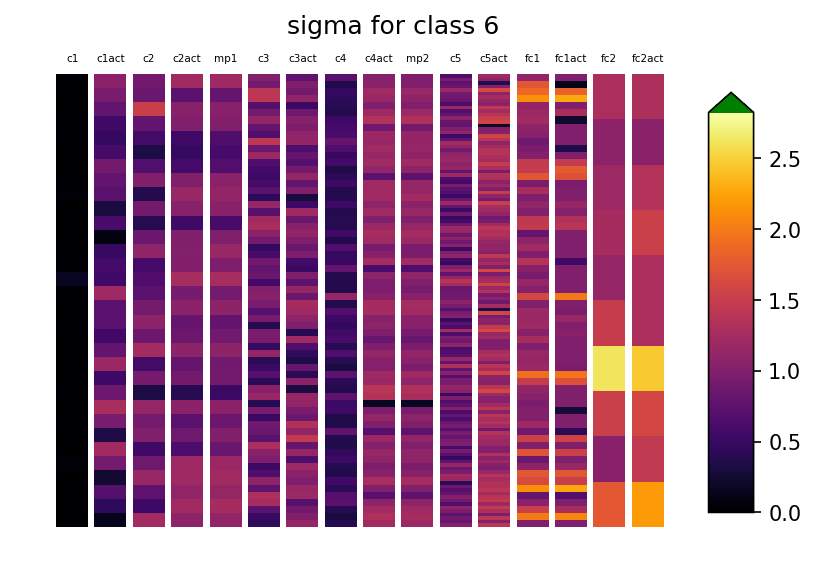

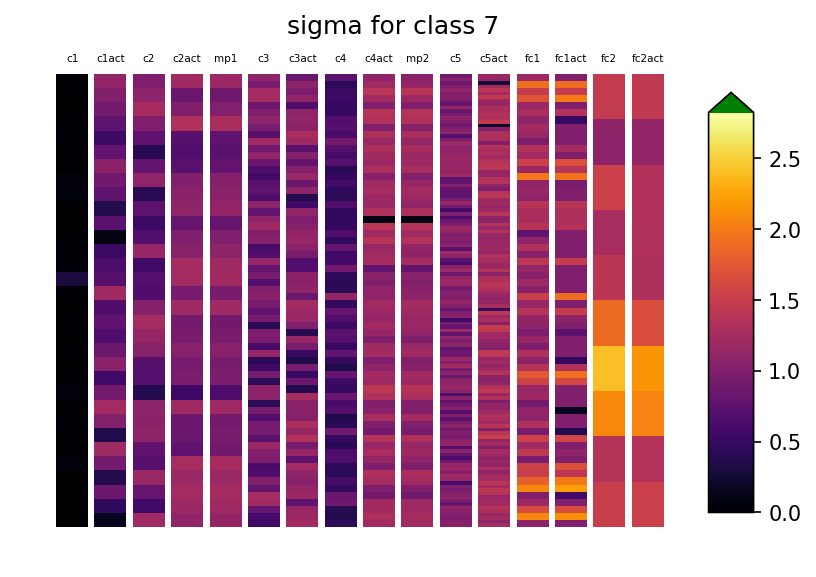

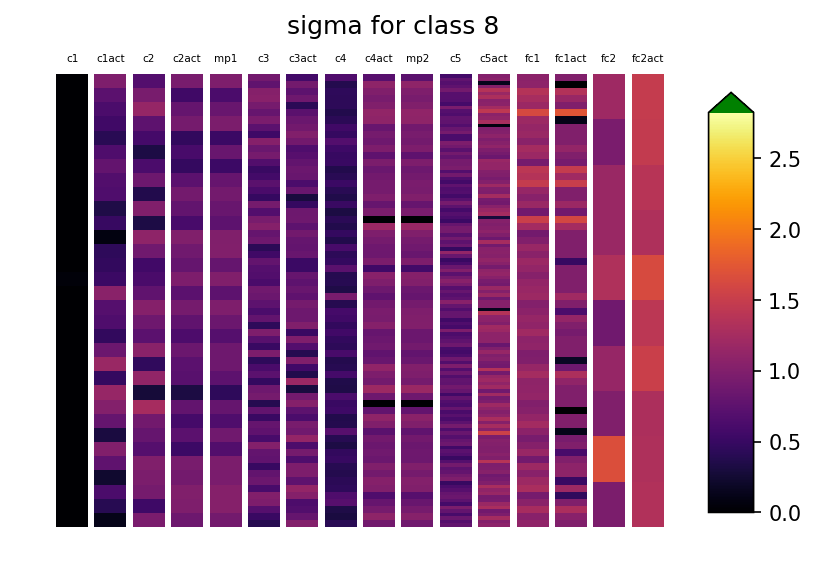

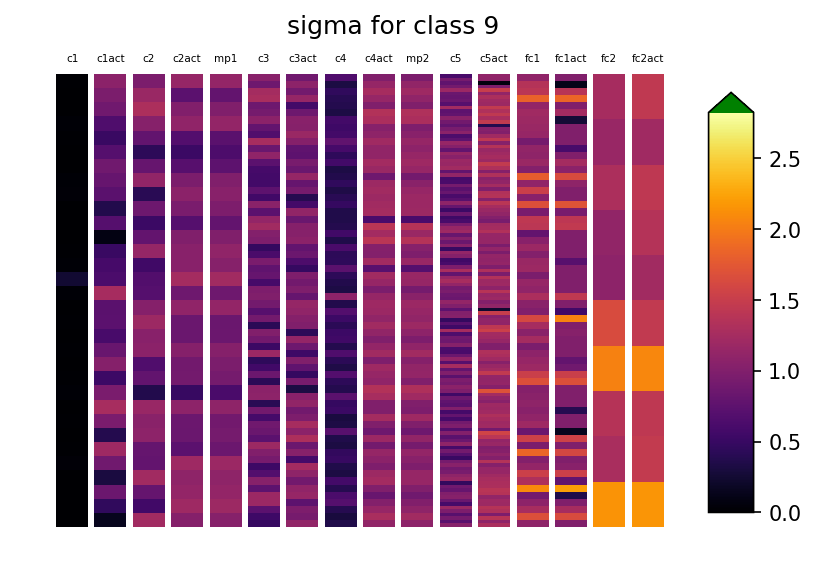

Calculating variance for all samples...


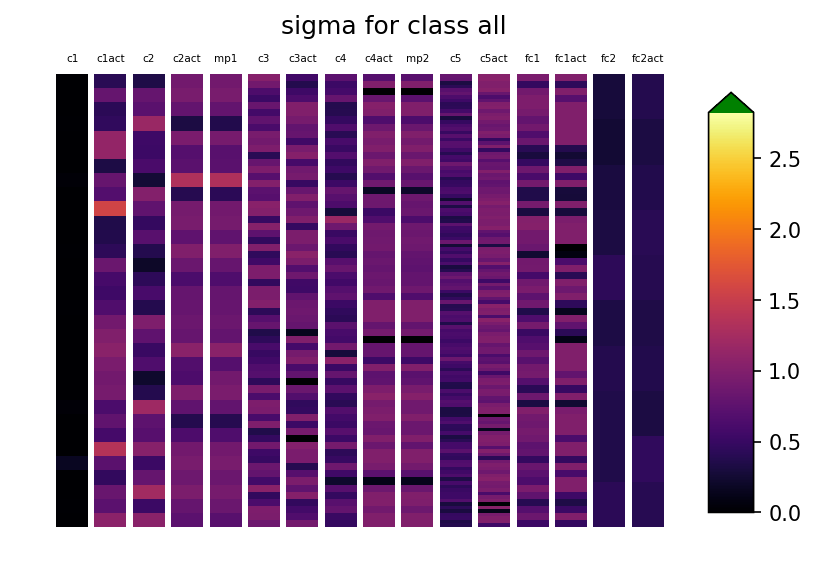

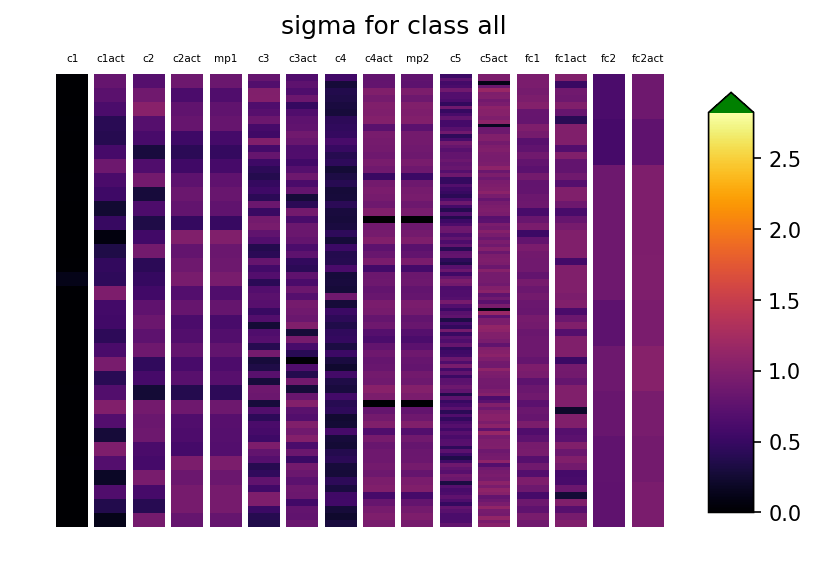

In [6]:
from pytorch.experiment import invariance

invariance.plot_all(model,rotated_model,dataset, config, n_rotations = 16)